In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

/tmp/ipykernel_2942/4113866726.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


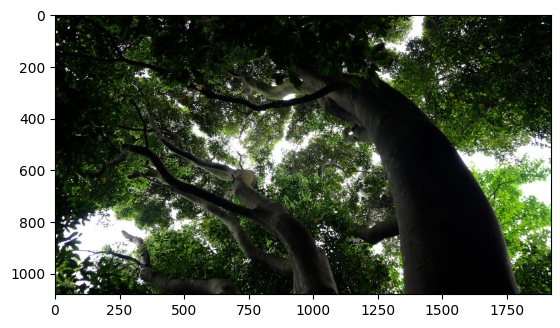

In [20]:
img1 = cv2.imread("../cv_data/tree.bmp")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

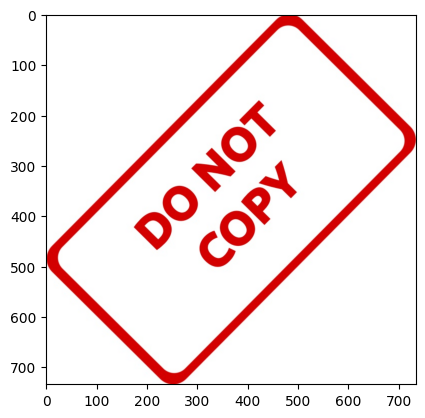

In [21]:
img2 = cv2.imread("../cv_data/watermark_no_copy.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [22]:
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))


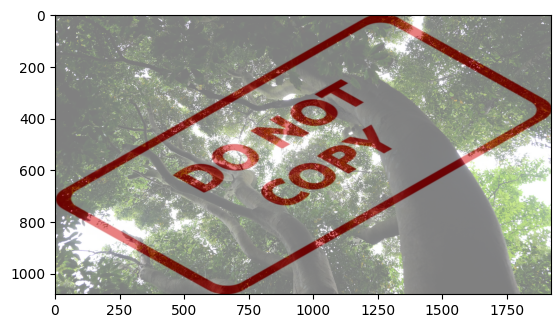

In [23]:
blended = cv2.addWeighted(src1 = img1, alpha=0.5, src2=img2, beta = 0.5, gamma=0)
plt.imshow(blended)

In [24]:
img2 = cv2.resize(img2, (600, 600))

In [25]:
print(img1.shape, img2.shape)

(1080, 1920, 3) (600, 600, 3)


In [26]:
large_img = img1.copy()
small_img = img2.copy()
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end, x_offset:x_end] = small_img

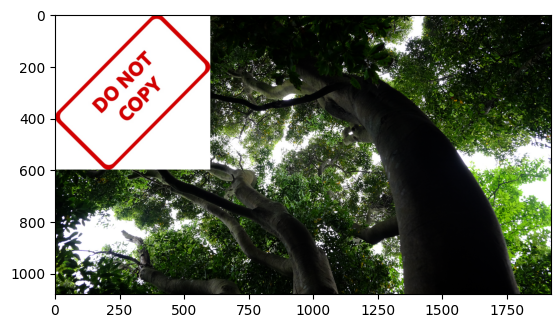

In [27]:
plt.imshow(large_img)

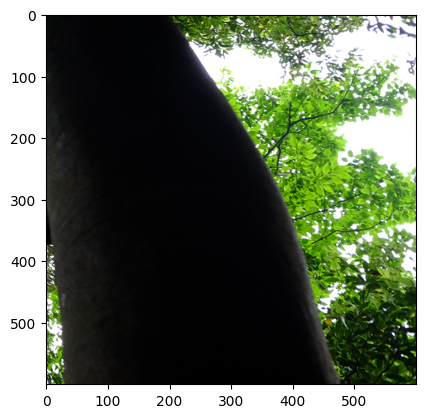

In [28]:
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0]
roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]
plt.imshow(roi)

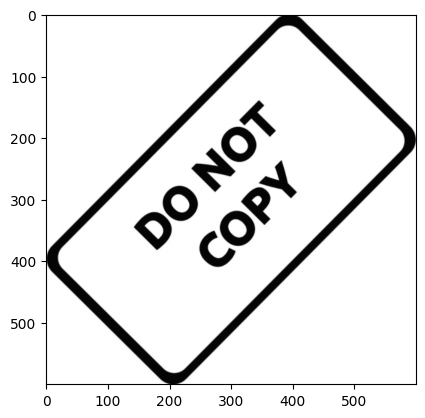

In [29]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap="gray")


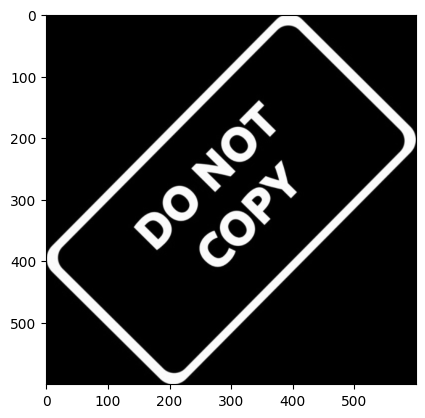

In [30]:
mask_inv = cv2.bitwise_not(img2_gray)

plt.imshow(mask_inv, cmap="gray")

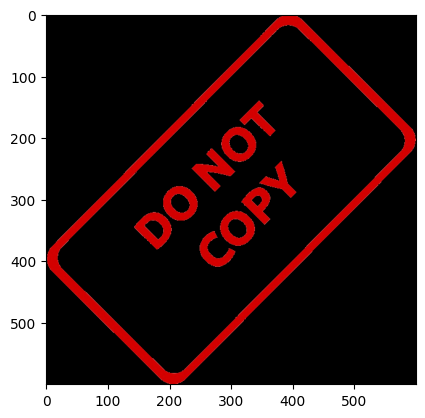

In [31]:
mask_inv[mask_inv<= 120] = 0
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

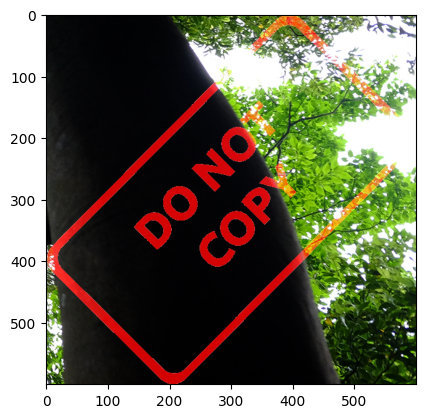

In [32]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

final_roi = fg * 
plt.imshow(final_roi)

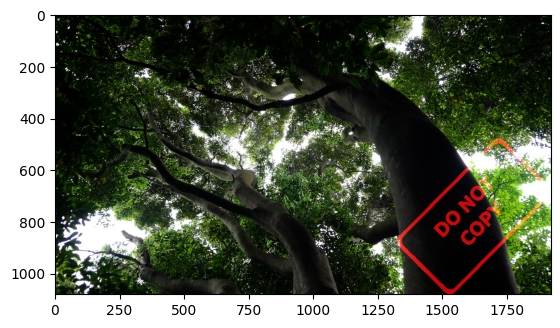

In [33]:
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = final_roi
plt.imshow(img1)

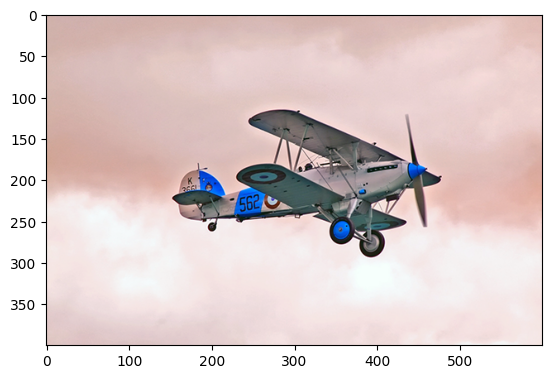

In [110]:
src = cv2.imread("../cv_data/airplane.bmp", cv2.IMREAD_COLOR)
plt.imshow(src)

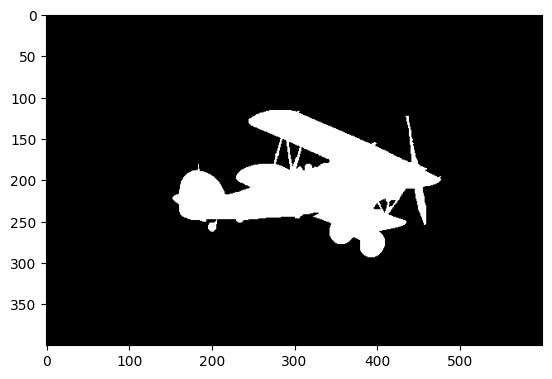

In [111]:
mask = cv2.imread("../cv_data/mask_plane.bmp",cv2.IMREAD_GRAYSCALE)
plt.imshow(mask,cmap="gray")

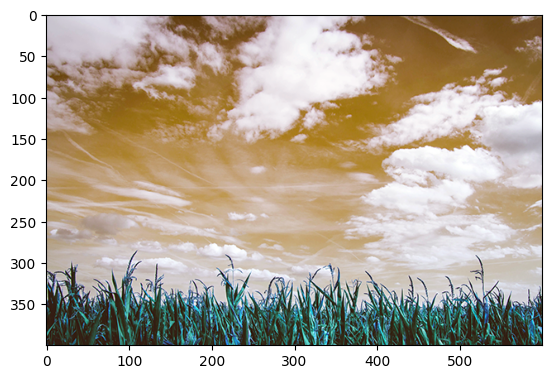

In [112]:
dst = cv2.imread("../cv_data/field.bmp", cv2.IMREAD_COLOR)
plt.imshow(dst)


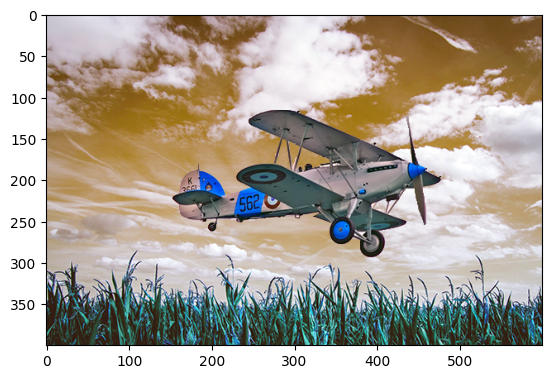

In [113]:
plt.imshow(cv2.copyTo(src, mask, dst))

In [2]:
import cv2
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 400)

while 1:
    ret, frame = cap.read()
    cv2.imshow("",frame)
    if cv2.waitKey(10) == 27:
        break

cap.release()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/rds/venv/opencv_venv/lib/python3.10/site-packages/cv2/qt/plugins"
